# Exemplo 1: Conceitos e aplicações gerais

In [1]:
# Importando os pacotes

import pandas as pd
import numpy as np

## - Importação do dataset

In [2]:
#%% Importando os bancos de dados

dados_tempo = pd.read_excel('datasets/dataset_principal.xls')
dados_merge = pd.read_excel('datasets/dataset_join.xls')

In [3]:
#%% Visualizando informações básicas do dataset e variáveis

# Printar objetos no console
dados_tempo

,Estudante,Tempo para chegar à escola (minutos),Distância percorrida até a escola (quilômetros),Quantidade de semáforos,Período do dia,Perfil ao volante
0,Gabriela,15,8,0,Manhã,calmo
1,Dalila,20,6,1,Manhã,moderado
2,Gustavo,20,15,0,Manhã,moderado
3,Letícia,40,20,1,Tarde,agressivo
4,Luiz Ovídio,50,25,2,Tarde,agressivo
5,Leonor,25,11,1,Manhã,moderado
6,Ana,10,5,0,Manhã,calmo
7,Antônio,55,32,3,Tarde,calmo
8,Júlia,35,28,1,Manhã,moderado
9,Mariana,30,20,1,Manhã,moderado


In [4]:
# Somente os nomes das variáveis
dados_tempo.columns

Index(['Estudante', 'Tempo para chegar à escola (minutos)',
       'Distância percorrida até a escola (quilômetros)',
       'Quantidade de semáforos', 'Período do dia', 'Perfil ao volante'],
      dtype='object')

In [5]:
# Somente primeiras "n" observações + nomes das variáveis
dados_tempo.head(n=5); # ; no fim do comando esconde o output, a fins de deixar o notebook mais legível

In [6]:
# Somente as últimas n observações + nome das variáveis
dados_tempo.tail(n=3);

In [7]:
# Informações detalhadas sobre as variáveis
dados_tempo.info()

# object = variável de texto
# int ou float = variável numérica (métrica)
# category = variável categórica (qualitativa)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Estudante                                        10 non-null     object
 1   Tempo para chegar à escola (minutos)             10 non-null     int64 
 2   Distância percorrida até a escola (quilômetros)  10 non-null     int64 
 3   Quantidade de semáforos                          10 non-null     int64 
 4   Período do dia                                   10 non-null     object
 5   Perfil ao volante                                10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


## - Renomear variáveis

In [8]:
#%% Alterando os nomes das variáveis


# No dataset de exemplo, os nomes das variáveis contêm:
# Espaços, maiúsculas, acentos e caracteres especiais...
# É melhor não utilizá-los, podem gerar conflito e dificultam a escrita


# Não é necessário trocar todos os nomes, pode ser um ou alguns deles

dados_tempo = dados_tempo.rename(columns={'Estudante':'estudante',
                                          'Tempo para chegar à escola (minutos)':'tempo',
                                          'Distância percorrida até a escola (quilômetros)': 'distancia',
                                          'Quantidade de semáforos': 'semaforos',
                                          'Período do dia': 'periodo',
                                          'Perfil ao volante': 'perfil'})
dados_tempo.head(n=5)

,estudante,tempo,distancia,semaforos,periodo,perfil
0,Gabriela,15,8,0,Manhã,calmo
1,Dalila,20,6,1,Manhã,moderado
2,Gustavo,20,15,0,Manhã,moderado
3,Letícia,40,20,1,Tarde,agressivo
4,Luiz Ovídio,50,25,2,Tarde,agressivo


In [9]:
#%% Alterando os nomes das variáveis

# Para reescrever o mesmo objeto, poderia utilizar: inplace = True

dados_tempo.rename(columns={'Estudante':'estudante',
                            'Tempo para chegar à escola (minutos)':'tempo',
                            'Distância percorrida até a escola (quilômetros)': 'distancia',
                            'Quantidade de semáforos': 'semaforos',
                            'Período do dia': 'periodo',
                            'Perfil ao volante': 'perfil'}, inplace=True)

## - Mudar tipo das variáveis

In [10]:
#%% Ajustar o tipo das variáveis categóricas

dados_tempo['periodo'] = dados_tempo['periodo'].astype('category')
dados_tempo['perfil'] = dados_tempo['perfil'].astype('category')

dados_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   estudante  10 non-null     object  
 1   tempo      10 non-null     int64   
 2   distancia  10 non-null     int64   
 3   semaforos  10 non-null     int64   
 4   periodo    10 non-null     category
 5   perfil     10 non-null     category
dtypes: category(2), int64(3), object(1)
memory usage: 724.0+ bytes


## - Valores únicos das variáveis

In [11]:
#%% Obtendo os valores únicos das variáveis

print(dados_tempo['tempo'].unique())
print(dados_tempo['periodo'].unique())


[15 20 40 50 25 10 55 35 30]
['Manhã', 'Tarde']
Categories (2, object): ['Manhã', 'Tarde']


## - Estatísticas descritivas

### Quantitativas

In [12]:
#%% Visualizando estatísticas descritivas

# Variáveis quantitativas
dados_tempo.describe()

,tempo,distancia,semaforos
count,10.00000,10.000000,10.000000
mean,30.00000,17.000000,1.000000
std,14.90712,9.510228,0.942809
min,10.00000,5.000000,0.000000
25%,20.00000,8.750000,0.250000
50%,27.50000,17.500000,1.000000
75%,38.75000,23.750000,1.000000
max,55.00000,32.000000,3.000000


### Qualitativas

In [13]:
#%% Visualizando estatísticas descritivas

# Frequências das variáveis qualitativas
pd.value_counts(dados_tempo['periodo'])

Manhã    7
Tarde    3
Name: periodo, dtype: int64

In [14]:
pd.value_counts(dados_tempo['perfil'])

moderado     5
calmo        3
agressivo    2
Name: perfil, dtype: int64

In [15]:
#%% Visualizando estatísticas descritivas

# Frequências para pares de variáveis qualitativas
pd.crosstab(dados_tempo['periodo'], dados_tempo['perfil'])

perfil,agressivo,calmo,moderado
periodo,,,
Manhã,0,2,5
Tarde,2,1,0


## - Adicionar e alterar variáveis

### Variável nova independente

In [16]:
#%% Adicionando variáveis em um novo objeto

novo_tempo = dados_tempo.copy()
numeros = pd.Series([1,2,3,4,5,6,7,8,9,10])
novo_tempo['numeros'] = numeros
novo_tempo.head(5)

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros
0,Gabriela,15,8,0,Manhã,calmo,1
1,Dalila,20,6,1,Manhã,moderado,2
2,Gustavo,20,15,0,Manhã,moderado,3
3,Letícia,40,20,1,Tarde,agressivo,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5


In [17]:
#%% Alterando e adicionando novas colunas ao dataset

# Adicionando uma variavel no objeto original

dados_tempo['numeros'] = numeros
dados_tempo.head(5)

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros
0,Gabriela,15,8,0,Manhã,calmo,1
1,Dalila,20,6,1,Manhã,moderado,2
2,Gustavo,20,15,0,Manhã,moderado,3
3,Letícia,40,20,1,Tarde,agressivo,4
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5


### Variável em função de outra

In [18]:
#%% Alterando e adicionando novas colunas ao dataset

# Criando uma nova variável em função de outros
dados_tempo['dobro_tempo'] = dados_tempo['tempo']*2
dados_tempo.head(5)

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo
0,Gabriela,15,8,0,Manhã,calmo,1,30
1,Dalila,20,6,1,Manhã,moderado,2,40
2,Gustavo,20,15,0,Manhã,moderado,3,40
3,Letícia,40,20,1,Tarde,agressivo,4,80
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100


### A partir de alteração das categorias de uma variável

In [19]:
#%% Alterando e adicionando novas colunas ao dataset

# Trocando textos por textos
novos_labels = {'calmo':'Perfil_1',
                'moderado': 'Perfil_2',
                'agressivo': 'Perfil_3'}

ajuste_1 = dados_tempo.assign(labels_perfil = dados_tempo.perfil.map(novos_labels))
ajuste_1.info()

# A nova variável está formada no tipo categórica (como na var. original)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   estudante      10 non-null     object  
 1   tempo          10 non-null     int64   
 2   distancia      10 non-null     int64   
 3   semaforos      10 non-null     int64   
 4   periodo        10 non-null     category
 5   perfil         10 non-null     category
 6   numeros        10 non-null     int64   
 7   dobro_tempo    10 non-null     int64   
 8   labels_perfil  10 non-null     category
dtypes: category(3), int64(5), object(1)
memory usage: 1.0+ KB


In [20]:
ajuste_1.head(5)

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,labels_perfil
0,Gabriela,15,8,0,Manhã,calmo,1,30,Perfil_1
1,Dalila,20,6,1,Manhã,moderado,2,40,Perfil_2
2,Gustavo,20,15,0,Manhã,moderado,3,40,Perfil_2
3,Letícia,40,20,1,Tarde,agressivo,4,80,Perfil_3
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100,Perfil_3


In [21]:
#%% Alterando e adicionando novas colunas ao dataset

# Trocando textos por números
novos_numeros = {'calmo': 1,
                 'moderado': 2,
                 'agressivo': 3}

ajuste_2 = dados_tempo.assign(labels_num = dados_tempo.perfil.map(novos_numeros))

# Caso seja correto para a aplicação, pode transformar a variável para número
# ATENÇÃO: Não realizar ponderação arbitrária
ajuste_2['labels_num'] = ajuste_2['labels_num'].astype('float')
ajuste_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   estudante    10 non-null     object  
 1   tempo        10 non-null     int64   
 2   distancia    10 non-null     int64   
 3   semaforos    10 non-null     int64   
 4   periodo      10 non-null     category
 5   perfil       10 non-null     category
 6   numeros      10 non-null     int64   
 7   dobro_tempo  10 non-null     int64   
 8   labels_num   10 non-null     float64 
dtypes: category(2), float64(1), int64(5), object(1)
memory usage: 964.0+ bytes


In [22]:
#%% Alterando e adicionando novas colunas ao dataset

# Trocando números por textos
muda_numeros = {0: 'zero',
                1: 'um',
                2: 'dois',
                3: 'três'}

ajuste_3 = dados_tempo.assign(labels_text = dados_tempo.semaforos.map(muda_numeros))
ajuste_3.info()

# A nova variável está formatada no tipo texto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   estudante    10 non-null     object  
 1   tempo        10 non-null     int64   
 2   distancia    10 non-null     int64   
 3   semaforos    10 non-null     int64   
 4   periodo      10 non-null     category
 5   perfil       10 non-null     category
 6   numeros      10 non-null     int64   
 7   dobro_tempo  10 non-null     int64   
 8   labels_text  10 non-null     object  
dtypes: category(2), int64(5), object(2)
memory usage: 964.0+ bytes


### Utilizando condições

In [23]:
#%% Alterando e adicionando novas colunas ao dataset

# Utilizando condições (where)
dados_tempo['categ'] = np.where(dados_tempo['tempo']<=20, 'Rápido',
                       np.where((dados_tempo['tempo']>20) & (dados_tempo['tempo']<=40), 'Médio',
                       np.where(dados_tempo['tempo']>40, 'Demorado',
                                "Demais")))
dados_tempo.head(5)

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
0,Gabriela,15,8,0,Manhã,calmo,1,30,Rápido
1,Dalila,20,6,1,Manhã,moderado,2,40,Rápido
2,Gustavo,20,15,0,Manhã,moderado,3,40,Rápido
3,Letícia,40,20,1,Tarde,agressivo,4,80,Médio
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100,Demorado


### Dummies

In [24]:
#%% Alterando e adicionando novas colunas ao dataset

# Criando variáveis binárias (todas as categorias)
dados_dummies_1 = pd.get_dummies(dados_tempo, prefix='Categoria_', columns=['periodo', 'perfil'])
dados_dummies_1.head(5)


,estudante,tempo,distancia,semaforos,numeros,dobro_tempo,categ,Categoria__Manhã,Categoria__Tarde,Categoria__agressivo,Categoria__calmo,Categoria__moderado
0,Gabriela,15,8,0,1,30,Rápido,1,0,0,1,0
1,Dalila,20,6,1,2,40,Rápido,1,0,0,0,1
2,Gustavo,20,15,0,3,40,Rápido,1,0,0,0,1
3,Letícia,40,20,1,4,80,Médio,0,1,1,0,0
4,Luiz Ovídio,50,25,2,5,100,Demorado,0,1,1,0,0


In [25]:

# Excluindo a primeira categoria
dados_dummies_2 = pd.get_dummies(dados_tempo, prefix='Categoria_', columns=['periodo', 'perfil'], drop_first=True)
dados_dummies_2.head(5)

,estudante,tempo,distancia,semaforos,numeros,dobro_tempo,categ,Categoria__Tarde,Categoria__calmo,Categoria__moderado
0,Gabriela,15,8,0,1,30,Rápido,0,1,0
1,Dalila,20,6,1,2,40,Rápido,0,0,1
2,Gustavo,20,15,0,3,40,Rápido,0,0,1
3,Letícia,40,20,1,4,80,Médio,1,0,0
4,Luiz Ovídio,50,25,2,5,100,Demorado,1,0,0


## - Organizando o dataset

In [26]:
#%% Organizando as observações por meio de critério

# Organizando em ordem crescente
org_tempo_1 = dados_tempo.sort_values(by=["tempo"], ascending=True)

# Organizando em ordem decrescente
org_tempo_2 = dados_tempo.sort_values(by=["tempo"], ascending=False)

# Também é possível organizar variáveis texto e categóricas
org_tempo_3 = dados_tempo.sort_values(by=["estudante"], ascending=True)
org_tempo_4 = dados_tempo.sort_values(by=["perfil"], ascending=False)

In [27]:
org_tempo_1.head(5);

In [28]:
org_tempo_2.head(5);

In [29]:
org_tempo_3.head(5);

In [30]:
org_tempo_4.head(5);

## - Selecionando variáveis

In [31]:

#%% Selecionando variáveis de interesse

# Selecionando com base nas posições (1º linhas, 2º colunas)
# ATENÇÃO: A contagem inicia em 0
dados_tempo.iloc[3,:] # argumento : indicam vazio na coluna
dados_tempo.iloc[:,4] # argumento : indicam vazio na linha
dados_tempo.iloc[2:5,:] # note que exclui a posição final
dados_tempo.iloc[:,3:5] # note que exclui a posição final
dados_tempo.iloc[2:4,3:5] # note que exclui as posições finais
dados_tempo.iloc[5,4];

# Também foi possível selecionar linhas com base nestes comandos

In [32]:
#%% Selecionando variáveis de interesse

# Aqui também é possível alterar a ordem das variáveis
tempo_selec_1 = dados_tempo[['estudante', 'periodo', 'tempo']]

# Copiando para um novo objeto
tempo_copia = dados_tempo[['estudante','tempo']].copy()

# Excluindo variáveis do banco de dados
tempo_selec_2 = dados_tempo.drop(columns=['semaforos','perfil'])

# Selecionando por meio de um início em comum
tempo_selec_3 = dados_tempo.loc[:, dados_tempo.columns.str.startswith('per')]

# Selecionando por meio de um final em comum
tempo_selec_4 = dados_tempo.loc[:, dados_tempo.columns.str.endswith('o')]

## - Filtrando observações

In [33]:
#%% Filtros de observações

# Variáveis categóricas
perfil_calmo = dados_tempo[dados_tempo['perfil'] == "calmo"]
perfil_calmo

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
0,Gabriela,15,8,0,Manhã,calmo,1,30,Rápido
6,Ana,10,5,0,Manhã,calmo,7,20,Rápido
7,Antônio,55,32,3,Tarde,calmo,8,110,Demorado


In [34]:
periodo_manha = dados_tempo[dados_tempo['periodo'] == "Manhã"]
periodo_manha

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
0,Gabriela,15,8,0,Manhã,calmo,1,30,Rápido
1,Dalila,20,6,1,Manhã,moderado,2,40,Rápido
2,Gustavo,20,15,0,Manhã,moderado,3,40,Rápido
5,Leonor,25,11,1,Manhã,moderado,6,50,Médio
6,Ana,10,5,0,Manhã,calmo,7,20,Rápido
8,Júlia,35,28,1,Manhã,moderado,9,70,Médio
9,Mariana,30,20,1,Manhã,moderado,10,60,Médio


In [35]:

# Interseção entre critérios (&)
dados_intersecao = dados_tempo[(dados_tempo['perfil'] == 'calmo') & (dados_tempo['periodo'] == 'Tarde')]
dados_intersecao

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
7,Antônio,55,32,3,Tarde,calmo,8,110,Demorado


In [36]:
# União entre critérios (|)
dados_uniao = dados_tempo[(dados_tempo['perfil'] == 'calmo') | (dados_tempo['periodo'] == 'Tarde')]
dados_uniao

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
0,Gabriela,15,8,0,Manhã,calmo,1,30,Rápido
3,Letícia,40,20,1,Tarde,agressivo,4,80,Médio
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100,Demorado
6,Ana,10,5,0,Manhã,calmo,7,20,Rápido
7,Antônio,55,32,3,Tarde,calmo,8,110,Demorado


In [37]:
# Critério de diferente (!=)
dados_dif = dados_tempo[(dados_tempo['perfil'] != 'calmo')]
dados_dif

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
1,Dalila,20,6,1,Manhã,moderado,2,40,Rápido
2,Gustavo,20,15,0,Manhã,moderado,3,40,Rápido
3,Letícia,40,20,1,Tarde,agressivo,4,80,Médio
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100,Demorado
5,Leonor,25,11,1,Manhã,moderado,6,50,Médio
8,Júlia,35,28,1,Manhã,moderado,9,70,Médio
9,Mariana,30,20,1,Manhã,moderado,10,60,Médio


In [38]:
# Utilizando operadores em variáveis métricas
tempo_1 = dados_tempo[dados_tempo['tempo'] >= 25]

tempo_2 = dados_tempo[(dados_tempo['tempo'] > 30) & (dados_tempo['distancia'] <= 25)]

tempo_3 = dados_tempo[dados_tempo['tempo'].between(25, 40, inclusive="both")]
# inclusive: "both", "neither", "left" ou "right"

In [39]:
# Comparando com valores de outro objeto (isin())
nomes = pd.Series(["Gabriela", "Gustavo", "Leonor", "Ana", "Júlia"])

contidos = dados_tempo[dados_tempo["estudante"].isin(nomes)]
contidos

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
0,Gabriela,15,8,0,Manhã,calmo,1,30,Rápido
2,Gustavo,20,15,0,Manhã,moderado,3,40,Rápido
5,Leonor,25,11,1,Manhã,moderado,6,50,Médio
6,Ana,10,5,0,Manhã,calmo,7,20,Rápido
8,Júlia,35,28,1,Manhã,moderado,9,70,Médio


In [40]:
nao_contidos = dados_tempo[dados_tempo["estudante"].isin(nomes)==False]
nao_contidos

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ
1,Dalila,20,6,1,Manhã,moderado,2,40,Rápido
3,Letícia,40,20,1,Tarde,agressivo,4,80,Médio
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100,Demorado
7,Antônio,55,32,3,Tarde,calmo,8,110,Demorado
9,Mariana,30,20,1,Manhã,moderado,10,60,Médio


## - Merge de datasets

In [41]:
#%% Junção de bancos de dados (merge)

# Inicialmente, deixar as colunas de id com o mesmo nome nos dois datasets
dados_merge.rename(columns={'Estudante':'estudante'}, inplace=True)

# Parâmetros de configuração na função merge:
    # how: é a direção do merge (quais ids restam na base final)
    # on: é a coluna com a chave para o merge

# Observações de dados_merge -> dados_tempo (ficam os ids de dados_tempo)
merge_1 = pd.merge(dados_tempo, dados_merge, how="left", on="estudante")
merge_1

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ,Região_Cidade
0,Gabriela,15,8,0,Manhã,calmo,1,30,Rápido,Região_A
1,Dalila,20,6,1,Manhã,moderado,2,40,Rápido,Região_B
2,Gustavo,20,15,0,Manhã,moderado,3,40,Rápido,Região_B
3,Letícia,40,20,1,Tarde,agressivo,4,80,Médio,Região_C
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100,Demorado,Região_D
5,Leonor,25,11,1,Manhã,moderado,6,50,Médio,Região_B
6,Ana,10,5,0,Manhã,calmo,7,20,Rápido,Região_A
7,Antônio,55,32,3,Tarde,calmo,8,110,Demorado,NaN
8,Júlia,35,28,1,Manhã,moderado,9,70,Médio,Região_C
9,Mariana,30,20,1,Manhã,moderado,10,60,Médio,Região_C


In [42]:

# Observações de dados_tempo -> dados_merge (ficam os ids de dados_merge)
merge_2 = pd.merge(dados_tempo, dados_merge, how="right", on="estudante")
merge_2

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ,Região_Cidade
0,Gabriela,15.0,8.0,0.0,Manhã,calmo,1.0,30.0,Rápido,Região_A
1,Dalila,20.0,6.0,1.0,Manhã,moderado,2.0,40.0,Rápido,Região_B
2,Letícia,40.0,20.0,1.0,Tarde,agressivo,4.0,80.0,Médio,Região_C
3,Leonor,25.0,11.0,1.0,Manhã,moderado,6.0,50.0,Médio,Região_B
4,Ana,10.0,5.0,0.0,Manhã,calmo,7.0,20.0,Rápido,Região_A
5,Júlia,35.0,28.0,1.0,Manhã,moderado,9.0,70.0,Médio,Região_C
6,Mariana,30.0,20.0,1.0,Manhã,moderado,10.0,60.0,Médio,Região_C
7,Gustavo,20.0,15.0,0.0,Manhã,moderado,3.0,40.0,Rápido,Região_B
8,Luiz Ovídio,50.0,25.0,2.0,Tarde,agressivo,5.0,100.0,Demorado,Região_D
9,Marcos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Região_D


In [43]:

# Observações das duas bases de dados constam na base final (ficam todos os ids)
merge_3 = pd.merge(dados_tempo, dados_merge, how="outer", on="estudante")
merge_3

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ,Região_Cidade
0,Gabriela,15.0,8.0,0.0,Manhã,calmo,1.0,30.0,Rápido,Região_A
1,Dalila,20.0,6.0,1.0,Manhã,moderado,2.0,40.0,Rápido,Região_B
2,Gustavo,20.0,15.0,0.0,Manhã,moderado,3.0,40.0,Rápido,Região_B
3,Letícia,40.0,20.0,1.0,Tarde,agressivo,4.0,80.0,Médio,Região_C
4,Luiz Ovídio,50.0,25.0,2.0,Tarde,agressivo,5.0,100.0,Demorado,Região_D
5,Leonor,25.0,11.0,1.0,Manhã,moderado,6.0,50.0,Médio,Região_B
6,Ana,10.0,5.0,0.0,Manhã,calmo,7.0,20.0,Rápido,Região_A
7,Antônio,55.0,32.0,3.0,Tarde,calmo,8.0,110.0,Demorado,NaN
8,Júlia,35.0,28.0,1.0,Manhã,moderado,9.0,70.0,Médio,Região_C
9,Mariana,30.0,20.0,1.0,Manhã,moderado,10.0,60.0,Médio,Região_C


In [44]:

# Somente os ids que constam nas duas bases ficam na base final (interseção)
merge_4 = pd.merge(dados_tempo, dados_merge, how="inner", on="estudante")
merge_4
# É importante verificar a existência de duplicidades de observações antes do merge

,estudante,tempo,distancia,semaforos,periodo,perfil,numeros,dobro_tempo,categ,Região_Cidade
0,Gabriela,15,8,0,Manhã,calmo,1,30,Rápido,Região_A
1,Dalila,20,6,1,Manhã,moderado,2,40,Rápido,Região_B
2,Gustavo,20,15,0,Manhã,moderado,3,40,Rápido,Região_B
3,Letícia,40,20,1,Tarde,agressivo,4,80,Médio,Região_C
4,Luiz Ovídio,50,25,2,Tarde,agressivo,5,100,Demorado,Região_D
5,Leonor,25,11,1,Manhã,moderado,6,50,Médio,Região_B
6,Ana,10,5,0,Manhã,calmo,7,20,Rápido,Região_A
7,Júlia,35,28,1,Manhã,moderado,9,70,Médio,Região_C
8,Mariana,30,20,1,Manhã,moderado,10,60,Médio,Região_C


## - Agrupamento em torno de uma ou mais variáveis

In [45]:
#%% Group by

# Criando um banco de dados agrupado
dados_periodo = dados_tempo.groupby(["periodo"])

# Gerando estatísticas descritivas
dados_periodo.describe()

tempo                                                    distancia  \
        count       mean       std   min   25%   50%   75%   max     count   
periodo                                                                      
Manhã     7.0  22.142857  8.591247  10.0  17.5  20.0  27.5  35.0       7.0   
Tarde     3.0  48.333333  7.637626  40.0  45.0  50.0  52.5  55.0       3.0   

                    ... numeros       dobro_tempo                              \
              mean  ...     75%   max       count       mean        std   min   
periodo             ...                                                         
Manhã    13.285714  ...     8.0  10.0         7.0  44.285714  17.182494  20.0   
Tarde    25.666667  ...     6.5   8.0         3.0  96.666667  15.275252  80.0   

                                    
          25%    50%    75%    max  
periodo                             
Manhã    35.0   40.0   55.0   70.0  
Tarde    90.0  100.0  105.0  110.0  

[2 rows x 40 columns]

In [46]:
# Caso a tabela gerada esteja com visualização ruim no print, pode transpor
dados_periodo.describe().T

periodo                Manhã       Tarde
tempo       count   7.000000    3.000000
            mean   22.142857   48.333333
            std     8.591247    7.637626
            min    10.000000   40.000000
            25%    17.500000   45.000000
            50%    20.000000   50.000000
            75%    27.500000   52.500000
            max    35.000000   55.000000
distancia   count   7.000000    3.000000
            mean   13.285714   25.666667
            std     8.360907    6.027714
            min     5.000000   20.000000
            25%     7.000000   22.500000
            50%    11.000000   25.000000
            75%    17.500000   28.500000
            max    28.000000   32.000000
semaforos   count   7.000000    3.000000
            mean    0.571429    2.000000
            std     0.534522    1.000000
            min     0.000000    1.000000
            25%     0.000000    1.500000
            50%     1.000000    2.000000
            75%     1.000000    2.500000
            max     1.000000    3.000000
numeros     count   7.000000    3.000000
            mean    5.428571    5.666667
            std     3.505098    2.081666
            min     1.000000    4.000000
            25%     2.500000    4.500000
            50%     6.000000    5.000000
            75%     8.000000    6.500000
            max    10.000000    8.000000
dobro_tempo count   7.000000    3.000000
            mean   44.285714   96.666667
            std    17.182494   15.275252
            min    20.000000   80.000000
            25%    35.000000   90.000000
            50%    40.000000  100.000000
            75%    55.000000  105.000000
            max    70.000000  110.000000

In [47]:
#%% Group by

# Criando um banco de dados agrupado por mais de um critério
dados_criterios = dados_tempo.groupby(["periodo", "perfil"])

# Gerando estatísticas descritivas
dados_criterios.describe()


tempo                                                  \
                  count  mean       std   min    25%   50%    75%   max   
periodo perfil                                                            
Manhã   calmo       2.0  12.5  3.535534  10.0  11.25  12.5  13.75  15.0   
        moderado    5.0  26.0  6.519202  20.0  20.00  25.0  30.00  35.0   
Tarde   agressivo   2.0  45.0  7.071068  40.0  42.50  45.0  47.50  50.0   
        calmo       1.0  55.0       NaN  55.0  55.00  55.0  55.00  55.0   

                  distancia        ... numeros       dobro_tempo         \
                      count  mean  ...     75%   max       count   mean   
periodo perfil                     ...                                    
Manhã   calmo           2.0   6.5  ...    5.50   7.0         2.0   25.0   
        moderado        5.0  16.0  ...    9.00  10.0         5.0   52.0   
Tarde   agressivo       2.0  22.5  ...    4.75   5.0         2.0   90.0   
        calmo           1.0  32.0  ...    8.00   8.0         1.0  110.0   

                                                                 
                         std    min    25%    50%    75%    max  
periodo perfil                                                   
Manhã   calmo       7.071068   20.0   22.5   25.0   27.5   30.0  
        moderado   13.038405   40.0   40.0   50.0   60.0   70.0  
Tarde   agressivo  14.142136   80.0   85.0   90.0   95.0  100.0  
        calmo            NaN  110.0  110.0  110.0  110.0  110.0  

[4 rows x 40 columns]

In [48]:
# Caso a tabela gerada esteja com visualização ruim no print, pode transpor
dados_criterios.describe().T

periodo                Manhã                  Tarde       
perfil                 calmo   moderado   agressivo  calmo
tempo       count   2.000000   5.000000    2.000000    1.0
            mean   12.500000  26.000000   45.000000   55.0
            std     3.535534   6.519202    7.071068    NaN
            min    10.000000  20.000000   40.000000   55.0
            25%    11.250000  20.000000   42.500000   55.0
            50%    12.500000  25.000000   45.000000   55.0
            75%    13.750000  30.000000   47.500000   55.0
            max    15.000000  35.000000   50.000000   55.0
distancia   count   2.000000   5.000000    2.000000    1.0
            mean    6.500000  16.000000   22.500000   32.0
            std     2.121320   8.455767    3.535534    NaN
            min     5.000000   6.000000   20.000000   32.0
            25%     5.750000  11.000000   21.250000   32.0
            50%     6.500000  15.000000   22.500000   32.0
            75%     7.250000  20.000000   23.750000   32.0
            max     8.000000  28.000000   25.000000   32.0
semaforos   count   2.000000   5.000000    2.000000    1.0
            mean    0.000000   0.800000    1.500000    3.0
            std     0.000000   0.447214    0.707107    NaN
            min     0.000000   0.000000    1.000000    3.0
            25%     0.000000   1.000000    1.250000    3.0
            50%     0.000000   1.000000    1.500000    3.0
            75%     0.000000   1.000000    1.750000    3.0
            max     0.000000   1.000000    2.000000    3.0
numeros     count   2.000000   5.000000    2.000000    1.0
            mean    4.000000   6.000000    4.500000    8.0
            std     4.242641   3.535534    0.707107    NaN
            min     1.000000   2.000000    4.000000    8.0
            25%     2.500000   3.000000    4.250000    8.0
            50%     4.000000   6.000000    4.500000    8.0
            75%     5.500000   9.000000    4.750000    8.0
            max     7.000000  10.000000    5.000000    8.0
dobro_tempo count   2.000000   5.000000    2.000000    1.0
            mean   25.000000  52.000000   90.000000  110.0
            std     7.071068  13.038405   14.142136    NaN
            min    20.000000  40.000000   80.000000  110.0
            25%    22.500000  40.000000   85.000000  110.0
            50%    25.000000  50.000000   90.000000  110.0
            75%    27.500000  60.000000   95.000000  110.0
            max    30.000000  70.000000  100.000000  110.0

## - Missing Values

In [49]:
#%% Excluindo valores faltantes (NA)

# Identificando variáveis com valores faltantes (isna())
print(merge_3.isna())

# Apresentando a contagem de NAs em cada variável
print(merge_3.isna().sum())

# Excluindo observações que apresentem valores faltantes
merge_exclui = merge_3.dropna()

    estudante  tempo  distancia  semaforos  periodo  perfil  numeros  \
0       False  False      False      False    False   False    False   
1       False  False      False      False    False   False    False   
2       False  False      False      False    False   False    False   
3       False  False      False      False    False   False    False   
4       False  False      False      False    False   False    False   
5       False  False      False      False    False   False    False   
6       False  False      False      False    False   False    False   
7       False  False      False      False    False   False    False   
8       False  False      False      False    False   False    False   
9       False  False      False      False    False   False    False   
10      False   True       True       True     True    True     True   

    dobro_tempo  categ  Região_Cidade  
0         False  False          False  
1         False  False          False  
2         False

## - Adicionando novas observações

In [50]:
#%% Anexando linhas ao banco de dados

dados_1 = pd.DataFrame({'var1': ['obs1','obs2','obs3'], 'var2':[10,20,30]})
dados_2 = pd.DataFrame({'var1': ['obs4','obs5'], 'var2':[40,50]})

dados_concat = pd.concat([dados_1, dados_2], ignore_index=True)
dados_concat

,var1,var2
0,obs1,10
1,obs2,20
2,obs3,30
3,obs4,40
4,obs5,50


# Exemplo 2: Dataset WDI World Bank

In [51]:
# O dataset contém muitos indicadores sobre o desenvolvimento dos países
# https://databank.worldbank.org/source/world-development-indicators

dados_wdi = pd.read_excel('datasets/WDI_World_Bank.xlsx', na_values='..')
dados_grupo = pd.read_excel('datasets/WDI_Income_Group.xlsx')

# Foi utilizado um argumento de ajuste de NAs já na importação (dados_wdi)

In [52]:
dados_wdi.head(5)

# O dataset está estruturado de modo que, para cada país, existem várias linhas
# Cada linha representa um tipo de indicador existente na fonte consultada
# Da forma como está, é difícil realizar análises com tais indicadores


,Country Name,Country Code,Series Name,Series Code,2021 [YR2021],Topic
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,Environment: Energy production & use
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,Environment: Energy production & use
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,Environment: Energy production & use
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,Environment: Energy production & use
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,Environment: Energy production & use


In [53]:
dados_grupo.head(5)

,Code,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,Latest population census,Latest household survey,Special Notes,...,IMF data dissemination standard,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,2-alpha code,WB-2 code,Table Name,Short Name
0,AFG,Islamic State of Afghanistan,Low income,South Asia,IDA,HIPC,Afghan afghani,1979,"Demographic and Health Survey, 2015",The reporting period for national accounts dat...,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0,AF,AF,Afghanistan,Afghanistan
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia,IBRD,NaN,Albanian lek,2020 (expected),"Demographic and Health Survey, 2017/18",NaN,...,Enhanced General Data Dissemination System (e-...,Living Standards Measurement Study Survey (LSM...,Yes,2012,2013.0,2018.0,AL,AL,Albania,Albania
2,DZA,People's Democratic Republic of Algeria,Lower middle income,Middle East & North Africa,IBRD,NaN,Algerian dinar,2020 (expected),"Multiple Indicator Cluster Survey, 2018/19",NaN,...,Enhanced General Data Dissemination System (e-...,"Integrated household survey (IHS), 2011",NaN,NaN,2010.0,2017.0,DZ,DZ,Algeria,Algeria
3,ASM,American Samoa,Upper middle income,East Asia & Pacific,NaN,NaN,U.S. dollar,2020 (expected),NaN,NaN,...,NaN,NaN,Yes,2008,NaN,NaN,AS,AS,American Samoa,American Samoa
4,AND,Principality of Andorra,High income,Europe & Central Asia,NaN,NaN,Euro,2011. Population figures compiled from adminis...,NaN,NaN,...,NaN,NaN,Yes,NaN,NaN,2018.0,AD,AD,Andorra,Andorra


In [54]:
#%% Informações básicas dos dados
dados_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383577 entries, 0 to 383576
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country Name   383574 non-null  object 
 1   Country Code   383572 non-null  object 
 2   Series Name    383572 non-null  object 
 3   Series Code    383572 non-null  object 
 4   2021 [YR2021]  108687 non-null  float64
 5   Topic          383572 non-null  object 
dtypes: float64(1), object(5)
memory usage: 17.6+ MB


In [55]:
# Vamos analisar um pouco melhor o conteúdo do dataset:

#%% Elementos únicos das variáveis

print(dados_wdi['Country Name'].unique())
print(dados_wdi['Series Name'].unique())
print(dados_wdi['Topic'].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece'
 'Greenland' 'Grenada' 'Guam' 'Guatemala

In [56]:
# Para facilitar, vamos iniciar simplificando os nomes das colunas

#%% Alterando os nomes das variáveis

dados_wdi.rename(columns={'Country Name':'pais',
                          'Country Code':'cod_pais',
                          'Series Name': 'serie',
                          'Series Code': 'cod_serie',
                          '2021 [YR2021]': 'ano_2021',
                          'Topic': 'topico'}, inplace=True)

In [57]:
#%% Analisando as últimas linhas do dataset

dados_wdi['pais'].tail(n=20)

383557                                               World
383558                                               World
383559                                               World
383560                                               World
383561                                               World
383562                                               World
383563                                               World
383564                                               World
383565                                               World
383566                                               World
383567                                               World
383568                                               World
383569                                               World
383570                                               World
383571                                               World
383572                                                 NaN
383573                                                 N

In [58]:
# Nota-se que as últimas linhas do banco de dados não são observações
# Vamos limpar de forma simples, selecionando as linhas válidas 
#%% Excluindo as linhas finais

dados_wdi = dados_wdi.iloc[0:383572,:]

In [59]:
# Vamos supor que o objetivo seja analisar informações do tópico "saúde"
# Existem vários tópicos sobre saúde, mas com diversos subtópicos
#%% Selecionando os tópicos de saúde

dados_saude = dados_wdi[dados_wdi['topico'].str.startswith("Health")]

In [60]:
dados_saude.head(5)

,pais,cod_pais,serie,cod_serie,ano_2021,topico
50,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,NaN,Health: Reproductive health
54,Afghanistan,AFG,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,1500.000000,Health: Risk factors
55,Afghanistan,AFG,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,1300.000000,Health: Risk factors
56,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,84.599257,Health: Population: Dynamics
57,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,4.437872,Health: Population: Dynamics


In [61]:
# Neste momento, já temos um dataset mais ajustado

# Porém, uma estrutura mais interessante seria colocar as séries nas colunas
# Assim, elas se tornariam variáveis e teríamos uma linha para cada país

#%% Colocando as séries nas colunas

# As séries se tornam variáveis e as observações são os países

dados_wide = pd.pivot(dados_saude, 
                      index=['pais','cod_pais'], 
                      columns=['serie'], 
                      values='ano_2021')
dados_wide.head(5)

# ATENÇÃO: na prática, seria fundamental ajustar os nomes das variáveis!

,serie,ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Antiretroviral therapy coverage (% of people living with HIV),Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),"Birth rate, crude (per 1,000 people)",...,"Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)","Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),UHC service coverage index,Unmet need for contraception (% of married women ages 15-49),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
pais,cod_pais,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,NaN,NaN,1500.0,1300.0,84.599257,4.437872,80.161385,10.000000,16.000000,NaN,...,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,29.100000,500.0
Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,81.190004,5.706194,74.565174,79.370724,89.943094,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.535130,NaN
Africa Western and Central,AFW,NaN,NaN,NaN,NaN,85.495451,5.337003,79.773361,77.519787,56.245001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.923126,NaN
Albania,ALB,NaN,NaN,100.0,100.0,48.183223,24.056432,24.126791,53.000000,NaN,NaN,...,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,26.600000,100.0
Algeria,DZA,NaN,NaN,2000.0,1600.0,58.463731,9.796228,48.667504,82.000000,16.000000,NaN,...,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,46.900000,200.0


In [62]:

# Voltando para o índice numérico

dados_wide = dados_wide.reset_index()
dados_wide.head(5)

serie,pais,cod_pais,ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Antiretroviral therapy coverage (% of people living with HIV),...,"Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)","Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),UHC service coverage index,Unmet need for contraception (% of married women ages 15-49),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Afghanistan,AFG,NaN,NaN,1500.0,1300.0,84.599257,4.437872,80.161385,10.000000,...,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,29.100000,500.0
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,81.190004,5.706194,74.565174,79.370724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.535130,NaN
2,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,85.495451,5.337003,79.773361,77.519787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.923126,NaN
3,Albania,ALB,NaN,NaN,100.0,100.0,48.183223,24.056432,24.126791,53.000000,...,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,26.600000,100.0
4,Algeria,DZA,NaN,NaN,2000.0,1600.0,58.463731,9.796228,48.667504,82.000000,...,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,46.900000,200.0


In [63]:
#%% Adicionar a categoria "income group" ao dataset final

dados_grupo_select = dados_grupo[['Code', 'Income Group']]
dados_grupo_select.head(5)

,Code,Income Group
0,AFG,Low income
1,ALB,Upper middle income
2,DZA,Lower middle income
3,ASM,Upper middle income
4,AND,High income


In [64]:
dados_grupo_select.rename(columns={'Code':'cod_pais'}, inplace=True)

/tmp/ipykernel_33353/1561782490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_grupo_select.rename(columns={'Code':'cod_pais'}, inplace=True)


In [65]:
dados_final = pd.merge(dados_wide, dados_grupo_select, how="left", on="cod_pais")
dados_final.head()

,pais,cod_pais,ARI treatment (% of children under 5 taken to a health provider),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Antiretroviral therapy coverage (% of people living with HIV),...,"Tuberculosis case detection rate (%, all forms)",Tuberculosis treatment success rate (% of new cases),UHC service coverage index,Unmet need for contraception (% of married women ages 15-49),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV,Income Group
0,Afghanistan,AFG,NaN,NaN,1500.0,1300.0,84.599257,4.437872,80.161385,10.000000,...,66.0,NaN,NaN,NaN,NaN,NaN,NaN,29.100000,500.0,Low income
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,81.190004,5.706194,74.565174,79.370724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.535130,NaN,NaN
2,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,85.495451,5.337003,79.773361,77.519787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.923126,NaN,NaN
3,Albania,ALB,NaN,NaN,100.0,100.0,48.183223,24.056432,24.126791,53.000000,...,56.0,NaN,NaN,NaN,NaN,NaN,NaN,26.600000,100.0,Upper middle income
4,Algeria,DZA,NaN,NaN,2000.0,1600.0,58.463731,9.796228,48.667504,82.000000,...,79.0,NaN,NaN,NaN,NaN,NaN,NaN,46.900000,200.0,Lower middle income


In [66]:
# Algumas variáveis estão sem informações para todas as observações
#%% Excluindo variáveis somente NAs

dados_final = dados_final.dropna(axis=1, how='all')

In [67]:
#%% Reorganizando a posição da coluna

organizar = dados_final.pop('Income Group')

dados_final.insert(2, 'Income Group', organizar)
dados_final.head()

# A partir deste banco de dados, seria possível iniciar as análises

,pais,cod_pais,Income Group,ARI treatment (% of children under 5 taken to a health provider),Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Antiretroviral therapy coverage (% of people living with HIV),...,"Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)",Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant),"Tuberculosis case detection rate (%, all forms)",Unmet need for contraception (% of married women ages 15-49),Use of insecticide-treated bed nets (% of under-5 population),Wanted fertility rate (births per woman),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Afghanistan,AFG,Low income,NaN,1500.0,1300.0,84.599257,4.437872,80.161385,10.000000,...,12.700000,2.300000,17.800000,NaN,66.0,NaN,NaN,NaN,29.100000,500.0
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,81.190004,5.706194,74.565174,79.370724,...,10.019342,7.579075,13.303628,NaN,NaN,NaN,NaN,NaN,60.535130,NaN
2,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,85.495451,5.337003,79.773361,77.519787,...,9.033256,12.113115,12.001839,NaN,NaN,NaN,NaN,NaN,62.923126,NaN
3,Albania,ALB,Upper middle income,NaN,100.0,100.0,48.183223,24.056432,24.126791,53.000000,...,1.600000,0.800000,1.900000,NaN,56.0,NaN,NaN,NaN,26.600000,100.0
4,Algeria,DZA,Lower middle income,NaN,2000.0,1600.0,58.463731,9.796228,48.667504,82.000000,...,2.400000,1.400000,3.000000,NaN,79.0,NaN,NaN,NaN,46.900000,200.0


# Exemplo 3: Comissão de Valores Mobiliários

In [68]:
#%% Importando os bancos de dados

# O dataset contém informações financeiras de companhias abertas brasileiras
# Fonte: https://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp

dados_cvm = pd.read_csv('datasets/CVM_Resultado.csv', 
                        sep=';',
                        encoding='latin1')

dados_cadastro = pd.read_csv('datasets/CVM_Dados_Cadastrais.csv', 
                        sep=';',
                        encoding='latin1')

# Vamos investigar como foi a variação nas vendas e no lucro das empresas
# No dataset, temos dois anos de informações: 2021 e 2022
# Como evoluíram a receita de vendas e o lucro líquido entre os anos?
# Foi diferente entre setores?

In [69]:
dados_cvm.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217.0,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051.0,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.01,Receita de Juros,125947217.0,N
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.01,Receita de Juros,236549051.0,N
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.02,Despesas de Intermediação Financeira,-66273138.0,S


In [70]:
dados_cadastro.head()

,CNPJ_CIA,DENOM_SOCIAL,DENOM_COMERC,DT_REG,DT_CONST,DT_CANCEL,MOTIVO_CANCEL,SIT,DT_INI_SIT,CD_CVM,...,UF_RESP,PAIS_RESP,CEP_RESP,DDD_TEL_RESP,TEL_RESP,DDD_FAX_RESP,FAX_RESP,EMAIL_RESP,CNPJ_AUDITOR,AUDITOR
0,08.773.135/0001-00,2W ECOBANK S.A.,2W ECOBANK S.A.,2020-10-29,2007-03-23,NaN,NaN,ATIVO,2020-10-29,25224,...,SP,NaN,4707000.0,11,39579400.0,NaN,NaN,ri@2wenergia.com.br,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.
1,11.396.633/0001-87,3A COMPANHIA SECURITIZADORA,TRIPLO A COMPANHIA SECURITIZADORA,2010-03-08,2009-11-03,2015-12-18,Cancelamento Voluntário - IN CVM 480/09,CANCELADA,2015-12-18,21954,...,RJ,NaN,20020000.0,21,22338867.0,21.0,22338867.0,juridico@triploasec.com.br,60.525.706/0001-07,MOORE STEPHENS LIMA LUCCHESI AUDITORES INDEPEN...
2,12.091.809/0001-55,3R PETROLEUM OLÉO E GÁS S.A.,NaN,2020-11-09,2010-06-08,NaN,NaN,ATIVO,2020-11-09,25291,...,RJ,NaN,22250180.0,21,21455555.0,0.0,0.0,ri@3rpetroleum.com.br,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.
3,01.547.749/0001-16,521 PARTICIPAÇOES S.A. - EM LIQUIDAÇÃO EXTRAJU...,521 PARTICIPAÇÕES S/A,1997-07-11,1996-07-30,NaN,NaN,ATIVO,1997-07-11,16330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.596.945/0001-83,BAKER TILLY 4PARTNERS AUDITORES INDEPENDENTES S/S
4,01.851.771/0001-55,524 PARTICIPAÇOES SA,524 PARTICIPACOES SA,1997-05-30,1997-04-02,NaN,NaN,ATIVO,1997-05-30,16284,...,RJ,NaN,20020010.0,21,38043700.0,0.0,0.0,gar@opportunity.com.br,40.262.602/0001-31,"BKR - LOPES, MACHADO AUDITORES"


In [71]:
dados_cvm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23484 entries, 0 to 23483
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CNPJ_CIA       23484 non-null  object 
 1   DT_REFER       23484 non-null  object 
 2   VERSAO         23484 non-null  int64  
 3   DENOM_CIA      23484 non-null  object 
 4   CD_CVM         23484 non-null  int64  
 5   GRUPO_DFP      23484 non-null  object 
 6   MOEDA          23484 non-null  object 
 7   ESCALA_MOEDA   23484 non-null  object 
 8   ORDEM_EXERC    23484 non-null  object 
 9   DT_INI_EXERC   23484 non-null  object 
 10  DT_FIM_EXERC   23484 non-null  object 
 11  CD_CONTA       23484 non-null  object 
 12  DS_CONTA       23484 non-null  object 
 13  VL_CONTA       23484 non-null  float64
 14  ST_CONTA_FIXA  23484 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.7+ MB


In [72]:
dados_cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CNPJ_CIA            2571 non-null   object 
 1   DENOM_SOCIAL        2571 non-null   object 
 2   DENOM_COMERC        2483 non-null   object 
 3   DT_REG              2571 non-null   object 
 4   DT_CONST            1642 non-null   object 
 5   DT_CANCEL           1784 non-null   object 
 6   MOTIVO_CANCEL       1782 non-null   object 
 7   SIT                 2571 non-null   object 
 8   DT_INI_SIT          2571 non-null   object 
 9   CD_CVM              2571 non-null   int64  
 10  SETOR_ATIV          2565 non-null   object 
 11  TP_MERC             668 non-null    object 
 12  CATEG_REG           1331 non-null   object 
 13  DT_INI_CATEG        1331 non-null   object 
 14  SIT_EMISSOR         1241 non-null   object 
 15  DT_INI_SIT_EMISSOR  1241 non-null   object 
 16  CONTRO

In [73]:
#%% Registros únicos das contas

contas = dados_cvm['DS_CONTA'].unique()
print(contas)

['Receitas de Intermediação Financeira' 'Receita de Juros'
 'Despesas de Intermediação Financeira' ... 'Venda de mercadorias'
 'Serviços prestados' 'Participação do Empregados']


In [74]:
#%% Filtrar as observações de interesse
# Em análise detalhada, identificou-se pelo código das contas (CD_CONTA)
# A receita principal da empresa é 3.01 e lucro/prejuízo líquido é 3.11
dados_sel = dados_cvm[(dados_cvm['CD_CONTA'] == '3.01') | (dados_cvm['CD_CONTA'] == '3.11')]
dados_sel.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217.0,S
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051.0,S
58,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,19722871.0,S
59,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,29849335.0,S
74,00.001.180/0001-26,2022-12-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,34626834.0,S


In [75]:
#%% Organizar as observações 
# Temos informações para 2021 e 2022, vamos coloca-lás juntas para cada empresa
# Para melhor organização, vamos separar as contas de receitas e lucros

# Colocando as informações de 2021 e 2022 juntas
# Separando as duas contas
dados_sel = dados_sel.sort_values(by=['CD_CONTA', 'CD_CVM'], ascending=True)
dados_sel.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
22776,92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2668221.0,S
22777,92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2331132.0,S
18284,60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125443431.0,S
18285,60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,205913274.0,S
0,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217.0,S


In [76]:
#%% Análise de duplicidades de observações

# Verificar se há duplicidade de observações e excluí-las se houver
# Vamos verificar se há 4 informações de cada empresa (2 para cada conta)

# pd.set_option('display.max_rows', None)  # Para ver todas as linhas
pd.reset_option('display.max_rows') # Para resetar a configuração acima
contagem = dados_sel.groupby(['CD_CVM', 'CD_CONTA'])['VL_CONTA'].count()
contagem

# Há um resíduo no dataset, a empresa com CD_CVM = 26077 tem duplicidades

CD_CVM  CD_CONTA
94      3.01        2
        3.11        2
906     3.01        2
        3.11        2
1023    3.01        2
                   ..
80187   3.11        2
80209   3.01        2
        3.11        2
80217   3.01        2
        3.11        2
Name: VL_CONTA, Length: 649, dtype: int64

In [77]:
#%% Exclusão do resíduo

# Em análise adicional, verificou-se que há "versões" de relatórios
# Vamos manter a última versão disponibilizada (VERSAO = 3)

dados_sel = dados_sel[~((dados_sel['CD_CVM'] == 26077) & (dados_sel['VERSAO'] == 3))]
# A inversão do critério de filtro foi feita por meio do ~

In [78]:

# Vamos adicionar os setores das empresas para fazer análises mais específicas
#%% Ajustando a base dos dados cadastrais

cadastrais = dados_cadastro[['CD_CVM', 'SETOR_ATIV']]

cadastrais = cadastrais[cadastrais['SETOR_ATIV'].notnull()] # elimina missings

# Como existem muitas variáveis de dados cadastrais, vamos selecionar e limpar

# Vamos manter apenas registros únicos (evitando duplicidade no merge)
cadastrais.drop_duplicates(subset=['CD_CVM', 'SETOR_ATIV'], keep=False, inplace=True)

In [79]:
# Ambas as bases, por serem da mesma fonte, têm uma variável em comum (CD_CVM)
# Vamos utilizá-la para um merge 
#%% Realizando o merge

dados_sel = pd.merge(dados_sel, cadastrais, how="left", on="CD_CVM")

In [80]:
# Por fim, vamos calcular a variação percentual e gerar a variável de interesse

#%% Vamos calcular a variação percentual

# Criar uma nova variável com o valor defasado
dados_sel['VALOR_LAG'] = dados_sel.groupby(['CD_CVM', 'CD_CONTA'])['VL_CONTA'].shift(1)

# Criando uma nova variável com o resultado da variação
dados_sel['VARIACAO'] = ((dados_sel['VL_CONTA'] - dados_sel['VALOR_LAG']) / dados_sel['VALOR_LAG'])

In [81]:
#%% Estatísticas descritivas

# Vamos separar um dataset reduzido e limpar a variável de interesse
variavel_analise = dados_sel[['DENOM_CIA', 'SETOR_ATIV', 'CD_CONTA', 'VARIACAO']]

variavel_analise = variavel_analise[~ variavel_analise['VARIACAO'].isin([np.nan, np.inf, -np.inf])]

print(variavel_analise['VARIACAO'].describe())

# Existem valores muito extremos influenciando as descritivas


count    640.000000
mean      -0.020210
std        5.786963
min     -111.283199
25%       -0.180638
50%        0.146019
75%        0.424540
max       44.179757
Name: VARIACAO, dtype: float64


In [82]:
#%% Vamos apenas excluir grandes variações
# Sem maiores análises ou fundamentação, vamos apenas excluir grandes variações
# Por exemplo, excluindo variações maiores do que 200% e menores do que -200%
# São indícios de variações significativas nos fundamentos da empresa

variavel_analise = variavel_analise[variavel_analise['VARIACAO'].between(-2, 2, inclusive="both")]


In [83]:
#%% Novas estatísticas descritivas

print(variavel_analise['VARIACAO'].describe())

count    592.000000
mean       0.121641
std        0.573453
min       -1.844774
25%       -0.132940
50%        0.136717
75%        0.373977
max        1.963848
Name: VARIACAO, dtype: float64


In [84]:
#%% Informações mais detalhadas por tipo de conta e setor

# Por tipo de conta: 3.01 = Receitas 3.11 = Lucro
print(variavel_analise.groupby(['CD_CONTA'])['VARIACAO'].describe().T)


CD_CONTA        3.01        3.11
count     316.000000  276.000000
mean        0.260204   -0.037004
std         0.406779    0.685468
min        -1.629511   -1.844774
25%         0.051519   -0.523758
50%         0.208045   -0.095805
75%         0.398266    0.326039
max         1.859819    1.963848


In [85]:

#%% Informações mais detalhadas por tipo de conta e setor

# Por setor
desc_setor = variavel_analise.groupby(['SETOR_ATIV'])['VARIACAO'].describe()
desc_setor

# Os números setoriais indicam que existem análises mais específicas a fazer
# Por exemplo, alguns setores podem ter poucas observações (média com viés)
# Mas, para fins de exemplos de ajustes em bases de dados, podemos parar aqui


,count,mean,std,min,25%,50%,75%,max
SETOR_ATIV,,,,,,,,
"Agricultura (Açúcar, Álcool e Cana)",21.0,0.428154,0.384129,-0.555822,0.247082,0.368897,0.595420,1.275795
Alimentos,18.0,0.054451,0.550722,-1.000000,-0.002188,0.142503,0.225876,1.366733
Bancos,19.0,0.439088,0.484818,-0.634153,0.171835,0.477486,0.702488,1.323257
Bebidas e Fumo,2.0,0.306813,0.797466,-0.257080,0.024866,0.306813,0.588760,0.870707
Brinquedos e Lazer,3.0,-0.194053,1.068631,-0.869384,-0.810077,-0.750769,0.143612,1.037993
Comunicação e Informática,18.0,0.358388,0.453467,-0.273594,0.095410,0.288345,0.468412,1.635707
Comércio (Atacado e Varejo),39.0,0.046173,0.536126,-1.844774,-0.305677,0.156042,0.300101,1.139118
"Construção Civil, Mat. Constr. e Decoração",53.0,0.152264,0.660387,-1.629511,-0.088537,0.105075,0.363754,1.826776
Educação,5.0,0.202656,0.696010,-0.702614,-0.190552,0.191128,0.628094,1.087225


# Exemplo 4: Jogos Copa do Mundo 2022

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
#%% Importando o banco de dados
dados_jogos = pd.read_csv('datasets/Jogos_Copa_22.csv', sep=',')

In [88]:
dados_jogos.head()

# De forma geral, o dataset já está bastante organizado
# As observações são os jogos que acontecetaram ao longo do campeonato
# As variáveis são as informações pertinentes aos jogos

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,0.33,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',..."
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,0.39,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2..."
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ..."
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ..."


In [89]:
#%% Informações básicas do dataset

dados_jogos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match_id                  64 non-null     int64  
 1   stage                     64 non-null     object 
 2   date                      64 non-null     object 
 3   pens                      64 non-null     bool   
 4   pens_home_score           64 non-null     object 
 5   pens_away_score           64 non-null     object 
 6   team_name_home            64 non-null     object 
 7   team_name_away            64 non-null     object 
 8   team_home_score           64 non-null     int64  
 9   team_away_score           64 non-null     int64  
 10  possession_home           64 non-null     float64
 11  possession_away           64 non-null     float64
 12  total_shots_home          64 non-null     int64  
 13  total_shots_away          64 non-null     int64  
 14  shots_on_tar

In [90]:
# Uma variável que não consta na lista é o time vencedor do jogo

#%% Criando uma variável com o time vencedor do jogo

dados_jogos['venceu'] = np.where((dados_jogos['team_home_score'] - dados_jogos['team_away_score'] > 0), 'mandante',
                        np.where((dados_jogos['team_home_score'] - dados_jogos['team_away_score'] < 0), 'visitante',
                        np.where((dados_jogos['team_home_score'] - dados_jogos['team_away_score'] == 0), 'empate',
                                "Demais")))
dados_jogos.head()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away,venceu
0,1,Final,18/12/2022,True,4,2,Argentina,France,3,3,...,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",empate
1,2,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,...,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',...",mandante
2,3,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,...,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2...",mandante
3,4,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,...,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ...",mandante
4,5,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,...,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",visitante


In [91]:
#%% Ajustando classe das variáveis numéricas

# Primeiramente, substituir os textos Falses por NAs
dados_jogos['pens_home_score'] = dados_jogos['pens_home_score'].replace("False", np.nan)
dados_jogos['pens_away_score'] = dados_jogos['pens_away_score'].replace("False", np.nan)
# Em seguida, convertendo para variáveis numéricas
dados_jogos['pens_home_score'] = dados_jogos['pens_home_score'].astype('float')
dados_jogos['pens_away_score'] = dados_jogos['pens_away_score'].astype('float')
dados_jogos.head()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away,venceu
0,1,Final,18/12/2022,True,4.0,2.0,Argentina,France,3,3,...,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",empate
1,2,Match for third place,17/12/2022,False,NaN,NaN,Croatia,Morocco,2,1,...,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',...",mandante
2,3,Semi-finals,14/12/2022,False,NaN,NaN,France,Morocco,2,0,...,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2...",mandante
3,4,Semi-finals,13/12/2022,False,NaN,NaN,Argentina,Croatia,3,0,...,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ...",mandante
4,5,Quarter-finals,10/12/2022,False,NaN,NaN,England,France,1,2,...,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",visitante


In [92]:
#%% Ajustando a variável com o time vencedor do jogo

dados_jogos['venceu'] = np.where(dados_jogos['pens_home_score'] - dados_jogos['pens_away_score'] > 0, 'mandante',
                        np.where(dados_jogos['pens_home_score'] - dados_jogos['pens_away_score'] < 0, 'visitante',
                        np.where(dados_jogos['pens_home_score'].isna(), dados_jogos['venceu'],
                                "Demais")))
dados_jogos.head()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,prediction_quantity,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away,venceu
0,1,Final,18/12/2022,True,4.0,2.0,Argentina,France,3,3,...,1002364,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",mandante
1,2,Match for third place,17/12/2022,False,NaN,NaN,Croatia,Morocco,2,1,...,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',...",mandante
2,3,Semi-finals,14/12/2022,False,NaN,NaN,France,Morocco,2,0,...,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2...",mandante
3,4,Semi-finals,13/12/2022,False,NaN,NaN,Argentina,Croatia,3,0,...,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ...",mandante
4,5,Quarter-finals,10/12/2022,False,NaN,NaN,England,France,1,2,...,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",visitante


In [93]:
#%% Contagem dos vencedores

print(dados_jogos['venceu'].value_counts())

mandante     32
visitante    22
empate       10
Name: venceu, dtype: int64


<AxesSubplot:xlabel='venceu', ylabel='count'>

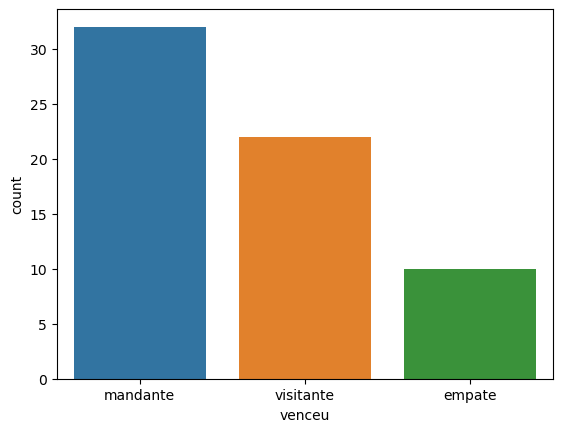

In [94]:
# Vamos gerar um gráfico para visualizar melhor a informação resultante

#%% Gerando um gráfico com as informações dos vencedores

sns.countplot(x=dados_jogos['venceu'])

In [95]:
# Vamos identificar as fases da competição e fazer uma análise mais específica:


#%% Identificando a fase da competição

dados_jogos['fase'] = dados_jogos['stage'].str.split(' ').str[0]
dados_jogos.head()

,match_id,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,...,location,events_list,lineup_home,lineup_away,player_names_home,player_numbers_home,player_names_away,player_numbers_away,venceu,fase
0,1,Final,18/12/2022,True,4.0,2.0,Argentina,France,3,3,...,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ...","['Di María', 'Álvarez', 'Messi', 'Mac Allister...","['11', '9', '10', '20', '24', '7', '3', '19', ...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",mandante,Final
1,2,Match for third place,17/12/2022,False,NaN,NaN,Croatia,Morocco,2,1,...,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ...","['Livaja', 'Oršić', 'Kramarić', 'Majer', 'Kova...","['14', '18', '9', '7', '8', '10', '4', '20', '...","['Boufal', 'En-Nesyri', 'Ziyech', 'Sabiri', 'A...","['17', '19', '7', '11', '4', '23', '25', '20',...",mandante,Match
2,3,Semi-finals,14/12/2022,False,NaN,NaN,France,Morocco,2,0,...,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '13', '8', '22', '24', ...","['En-Nesyri', 'Boufal', 'Amrabat', 'Ounahi', '...","['19', '17', '4', '8', '7', '3', '18', '6', '2...",mandante,Semi-finals
3,4,Semi-finals,13/12/2022,False,NaN,NaN,Argentina,Croatia,3,0,...,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':...","['Álvarez', 'Messi', 'Mac Allister', 'Fernánde...","['9', '10', '20', '24', '5', '7', '3', '19', '...","['Perišić', 'Kramarić', 'Pašalić', 'Kovačić', ...","['4', '9', '15', '8', '11', '10', '19', '20', ...",mandante,Semi-finals
4,5,Quarter-finals,10/12/2022,False,NaN,NaN,England,France,1,2,...,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ...","['Foden', 'Kane', 'Saka', 'Bellingham', 'Rice'...","['20', '9', '17', '22', '4', '8', '3', '6', '5...","['Giroud', 'Mbappé', 'Griezmann', 'Dembélé', '...","['9', '10', '7', '11', '14', '8', '22', '18', ...",visitante,Quarter-finals


In [96]:
#%% Vencedores por fase da competição

dados_jogos.groupby(['fase'])['venceu'].value_counts()


fase            venceu   
Final           mandante      1
Group           mandante     19
                visitante    19
                empate       10
Match           mandante      1
Quarter-finals  mandante      2
                visitante     2
Round           mandante      7
                visitante     1
Semi-finals     mandante      2
Name: venceu, dtype: int64

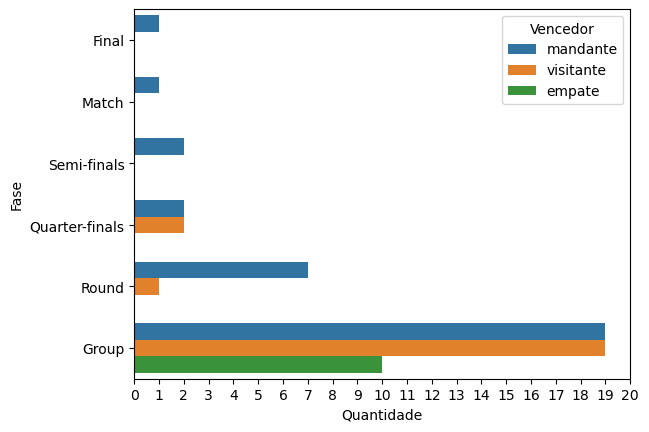

In [97]:
# Vamos analisar o gráfico de acordo com as fases da competição:

#%% Gerando um gráfico com as informações dos vencedores por fase

sns.countplot(data=dados_jogos, y='fase', hue='venceu')
plt.legend(loc='upper right', title='Vencedor')
plt.xlabel('Quantidade')
plt.ylabel('Fase')
plt.xticks(np.arange(0, 21, step=1))
plt.show()

In [98]:

# Uma informação interessante seria identificar os jogadores que fizeram os gols
# Esta informação está na variável "events_list" que é uma string mais complexa
# Precisamos retirar a informação específica, então vamos procurar um padrão
# A informação que queremos está após -- 'Goal', 'action_player_1': ' --

#%% Extraindo os jogadores que fizeram gols

extrai_gol = dados_jogos['events_list'].str.extractall("'Goal', 'action_player_1': '\\w*(.*?)\\w*\\'")
extrai_gol

# Acima, utilizamos regex (regular expression), úteis para trabalhar em strings

0
   match                   
0  0        Ángel Di María 
   1         Kylian Mbappé 
   2          Lionel Messi 
1  0        Joško Gvardiol 
   1           Achraf Dari 
...                     ...
62 3           Bukayo Saka 
   4          Mehdi Taremi 
   5       Marcus Rashford 
   6         Jack Grealish 
63 0        Enner Valencia 

[153 rows x 1 columns]

In [99]:
# O mesmo critério vamos usar para extrair os gols de pênalti

#%% Extraindo os jogadores que fizeram gols de pênaltis

extrai_penalti = dados_jogos['events_list'].str.extractall("'event_type': 'Penalty', 'action_player_1': '\\w*(.*?)\\w*\\'")
extrai_penalti

0
   match                      
0  0             Lionel Messi 
   1            Kylian Mbappé 
   2            Kylian Mbappé 
3  0             Lionel Messi 
4  0               Harry Kane 
6  0             Lionel Messi 
10 0                   Neymar 
13 0       Robert Lewandowski 
31 0             Ismaïla Sarr 
32 0          Bruno Fernandes 
49 0        Cristiano Ronaldo 
53 0            Ferran Torres 
54 0           Ilkay Gündoğan 
59 0             Lionel Messi 
60 0              Gareth Bale 
62 0             Mehdi Taremi 
63 0           Enner Valencia

In [100]:
# Por fim, podemos pedir uma tabela de frequências dos gols

gols = pd.concat([extrai_gol, extrai_penalti], ignore_index=True)
gols

,0
0,Ángel Di María
1,Kylian Mbappé
2,Lionel Messi
3,Joško Gvardiol
4,Achraf Dari
...,...
165,Ilkay Gündoğan
166,Lionel Messi
167,Gareth Bale
168,Mehdi Taremi


In [101]:
gols.value_counts()

 Kylian Mbappé      8
 Lionel Messi       7
 Olivier Giroud     4
 Julián Álvarez     4
 Gonçalo Ramos      3
                   ..
 Henry Martín       1
 Hakim Ziyech       1
 Haji Wright        1
 Gavi               1
 Ángel Di María     1
Length: 117, dtype: int64

# Exemplo 5: Datasets de filmes e séries

In [103]:
# Importando os bancos de dados
# Os datasets contêm informações de filmes e séries disponíveis em streamings

# Fonte: https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney

dados_filmes = pd.read_csv('datasets/Filmes_Streaming.csv', sep=',')
dados_series = pd.read_csv('datasets/Séries_Streaming.csv', sep=',')

In [104]:
dados_filmes.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [105]:
dados_series.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [107]:
# Os dois datasets têm estruturas semelhantes quanto às variáveis
# Porém, o dataset sobre filmes tem colunas a mais
# Vamos fazer uma rápida organização dos datasets e juntá-los

dados_filmes = dados_filmes.iloc[:,0:12]

dados_completo = pd.concat([dados_filmes, dados_series], ignore_index=True)

dados_completo.drop(dados_completo.columns[[0]], axis=1, inplace=True)
dados_completo.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0


In [109]:
# O banco de dados contém avaliações das agências Rotten Tomatoes e IMDb
# Vamos procurar os melhores classificados em ambas as agências

# O primeiro passo é ajustar as duas variáveis com notas, pois são texto


dados_completo['Ajuste_IMDB'] = dados_completo['IMDb'].str.slice(0, 4)
dados_completo['Ajuste_Rotten'] = dados_completo['Rotten Tomatoes'].str.slice(0, 3)

dados_completo['Ajuste_IMDB'] = dados_completo['Ajuste_IMDB'].str.rstrip('/').astype('float')
dados_completo['Ajuste_Rotten'] = dados_completo['Ajuste_Rotten'].str.rstrip('/').astype('float')
dados_completo.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Ajuste_IMDB,Ajuste_Rotten
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,7.8,98.0
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,8.4,97.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,9.0,95.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,8.1,94.0
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,7.7,94.0


In [111]:

#%% Gerando estatísticas sobre as notas

# Atribuindo labels
muda_numeros = {0: 'filme', 1: 'série'}
dados_completo = dados_completo.assign(labels_text = dados_completo.Type.map(muda_numeros))
dados_completo.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Ajuste_IMDB,Ajuste_Rotten,labels_text
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,7.8,98.0,filme
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,8.4,97.0,filme
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,9.0,95.0,filme
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,8.1,94.0,filme
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,7.7,94.0,filme


In [112]:
# Agrupando o dataset
descritivas = dados_completo.groupby(['labels_text'])

In [113]:
# Gerando estatísticas por variável
print(descritivas['Ajuste_IMDB'].describe().T)
print(descritivas['Ajuste_Rotten'].describe().T)

labels_text        filme        série
count        9309.000000  4406.000000
mean            6.156311     7.086019
std             1.163573     1.114977
min             1.100000     1.100000
25%             5.500000     6.500000
50%             6.300000     7.300000
75%             7.000000     7.900000
max             9.800000     9.600000
labels_text        filme        série
count        9508.000000  5368.000000
mean           53.545015    47.220380
std            13.197673    19.555753
min            10.000000    10.000000
25%            44.000000    36.000000
50%            52.000000    48.000000
75%            62.000000    60.000000
max            98.000000   100.000000


In [123]:
#%% Criando um indicador dos "melhores" filmes e séries 

melhores_series = dados_completo[dados_completo['labels_text']=='série']
melhores_filmes = dados_completo[dados_completo['labels_text']=='filme']

In [124]:
melhores_series.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Ajuste_IMDB,Ajuste_Rotten,labels_text
9515,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1,9.4,100.0,série
9516,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1,8.7,96.0,série
9517,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1,9.0,95.0,série
9518,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1,8.8,94.0,série
9519,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1,8.8,93.0,série


In [125]:
melhores_filmes.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Ajuste_IMDB,Ajuste_Rotten,labels_text
0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,7.8,98.0,filme
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,8.4,97.0,filme
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,9.0,95.0,filme
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,8.1,94.0,filme
4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,7.7,94.0,filme


In [126]:
# Em seguida, vamos verificar as médias e as médias por tipo (filme ou série)
# E vamos procurar um ponto de corte mais restritivo, o percentil 95

#%% Séries
melhores_series['Categ_IMDB'] = pd.qcut(melhores_series.Ajuste_IMDB,
                                        q=[0, 0.95, 1.0],
                                        labels=['menores',
                                                'maiores'])

melhores_series['Categ_Rotten'] = pd.qcut(melhores_series.Ajuste_Rotten,
                                          q=[0, 0.95, 1.0],
                                          labels=['menores',
                                                  'maiores'])

melhores_series = melhores_series[(melhores_series['Categ_IMDB']=='maiores') & 
                                  (melhores_series['Categ_Rotten']=='maiores')]

/tmp/ipykernel_33353/1119504050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melhores_series['Categ_IMDB'] = pd.qcut(melhores_series.Ajuste_IMDB,
/tmp/ipykernel_33353/1119504050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melhores_series['Categ_Rotten'] = pd.qcut(melhores_series.Ajuste_Rotten,


In [127]:
#%% Filmes

melhores_filmes['Categ_IMDB'] = pd.qcut(melhores_filmes.Ajuste_IMDB,
                                        q=[0, 0.95, 1.0],
                                        labels=['menores',
                                                'maiores'])

melhores_filmes['Categ_Rotten'] = pd.qcut(melhores_filmes.Ajuste_Rotten,
                                          q=[0, 0.95, 1.0],
                                          labels=['menores',
                                                  'maiores'])

melhores_filmes = melhores_filmes[(melhores_filmes['Categ_IMDB']=='maiores') & 
                                  (melhores_filmes['Categ_Rotten']=='maiores')]

/tmp/ipykernel_33353/2256851915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melhores_filmes['Categ_IMDB'] = pd.qcut(melhores_filmes.Ajuste_IMDB,
/tmp/ipykernel_33353/2256851915.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melhores_filmes['Categ_Rotten'] = pd.qcut(melhores_filmes.Ajuste_Rotten,


In [129]:
melhores_series

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Ajuste_IMDB,Ajuste_Rotten,labels_text,Categ_IMDB,Categ_Rotten
9515,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1,9.4,100.0,série,maiores,maiores
9516,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1,8.7,96.0,série,maiores,maiores
9517,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1,9.0,95.0,série,maiores,maiores
9518,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1,8.8,94.0,série,maiores,maiores
9519,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1,8.8,93.0,série,maiores,maiores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,3597,The Marvelous Mrs. Maisel,2017,18+,8.7/10,86/100,0,0,1,0,1,8.7,86.0,série,maiores,maiores
12983,3616,The Family Man,2019,16+,8.8/10,83/100,0,0,1,0,1,8.8,83.0,série,maiores,maiores
12987,3626,The Grand Tour,2016,16+,8.7/10,81/100,0,0,1,0,1,8.7,81.0,série,maiores,maiores
12993,3634,Endeavour,2013,16+,8.6/10,80/100,0,0,1,0,1,8.6,80.0,série,maiores,maiores


In [130]:
melhores_filmes

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Ajuste_IMDB,Ajuste_Rotten,labels_text,Categ_IMDB,Categ_Rotten
1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,8.4,97.0,filme,maiores,maiores
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,9.0,95.0,filme,maiores,maiores
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,8.1,94.0,filme,maiores,maiores
10,11,Article 15,2019,18+,8.2/10,92/100,1,0,0,0,0,8.2,92.0,filme,maiores,maiores
14,15,Swades,2004,all,8.2/10,91/100,1,0,0,0,0,8.2,91.0,filme,maiores,maiores
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,8662,The Nightmare Before Christmas,1993,7+,8.0/10,83/100,0,0,0,1,0,8.0,83.0,filme,maiores,maiores
8673,8674,Hamilton,2020,13+,8.4/10,81/100,0,0,0,1,0,8.4,81.0,filme,maiores,maiores
8678,8679,Fantastic Mr. Fox,2009,7+,7.9/10,81/100,0,0,0,1,0,7.9,81.0,filme,maiores,maiores
8687,8688,The Sound of Music,1965,all,8.0/10,80/100,0,0,0,1,0,8.0,80.0,filme,maiores,maiores
